In [203]:
#Cargamos librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score

In [204]:
df = pd.read_csv('Francia_limpio.csv')
df.head()

,Unnamed: 0,name,host_name,host_since,host_location,host_about,host_response_time,host_is_superhost,host_neighbourhood,host_identity_verified,...,number_of_reviews_l30d,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_entire_homes.1,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,"Duplex avec vue, centre ville",Isabelle,2010-10-24,"Lyon, France",I'm 47 years old. I enjoy books and arts. I'm ...,within a few hours,f,5th Arrondissement,t,...,0.0,4.70,4.71,4.78,4.86,1.0,1.0,1.0,0.0,0.33
1,1,Nice Flat in the center of Lyon,Clementine,2011-02-26,"Lyon, France",Je travaille dans le cinéma et je voyage beauc...,within an hour,f,5th Arrondissement,t,...,1.0,4.75,4.80,4.96,4.88,1.0,1.0,1.0,0.0,0.15
2,2,"Centre of old town,home sweet home",Polali,2011-06-03,"Lyon, France","J'ai 34 ans , je suis animatrice auprès de per...",a few days or more,f,5th Arrondissement,t,...,0.0,4.48,4.27,4.72,4.86,1.0,1.0,1.0,0.0,0.82
3,3,"Bel apartment, 2 rooms, Lyon center",Sandrine,2011-06-06,"Lyon, France","We are a family with 3 daughters, aged 16-14-1...",within an hour,f,1st Arrondissement,t,...,0.0,4.78,4.89,4.89,4.95,1.0,1.0,1.0,0.0,0.12
4,4,Quartier Terreaux 4/6 pers. Hyper centre / Clim,Giuseppina,2011-07-18,"Rhône-Alpes, France","Mon pays d'origine est l'Italie, mais je résid...",within an hour,f,1st Arrondissement,t,...,2.0,4.62,4.86,4.83,4.88,2.0,1.0,1.0,0.0,2.99


  ** Usamos las siguientes ecuaciones como funciones de ajuste.**
            y = ax^2 + bx + c   ("Función cuadrática")
            y = a*exp(-bx) + c   ("Función exponencial")
            y =1/a*x            ("Función inversa")
            y = a*np.sin(x) + b ("Función senoidal")
            y = a*np.tan(x) + b ("Función tangencial")
            y = a*np.abs(x) + b*x + c (Función Valor absoluto)
            y = (a*x**2 + b)/ c*x (Función cociente entre polinomios) #esta
            y = a*np.log(x) + b  (Función logaritmica)
            y = a*x + b*x + c*x (Función lineal con producto de coeficientes)
            y = 1/a*x**2  (Función cuadrática inversa)
            y = a/b*x**2 + c*x (Función polinomial inversa

# Host_response_rate

**REGRESIÓN LINEAL**

In [205]:
# Declaramos las variables correctamente
Vari_Independiente = df[['review_scores_rating']]  
Vari_Dependiente = df['host_response_rate']      

# Modelo de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Ajustar el modelo
model.fit(X=Vari_Independiente, y=Vari_Dependiente)

# Coeficientes
coef_Deter = model.score(X=Vari_Independiente, y=Vari_Dependiente)
print(f'Coeficiente de determinación:', coef_Deter)

coef_Correl = np.sqrt(coef_Deter)
print(f'Coeficiente de correlación:', coef_Correl)

Coeficiente de determinación: 1.0
Coeficiente de correlación: 1.0


**REGRESIÓN NO LINEAL**

In [206]:
#Declaramos las variables dependientes e independientes para la regresión  no lineal
Vars_Indep = df[['review_scores_rating']]
Var_Dep = df['host_response_rate']

In [207]:
#Redefinimos
x = Vars_Indep
y = Var_Dep

**MODELO 1**

In [208]:
def funcion_cuadratica (x,a,b,c): #Variable x y los coeficientes a,b,c
    return a*x**2 + b*x+c #cuadrática

In [209]:
#Ajustamos los parámetros de la función curve_fit
parametros1, covs = curve_fit(funcion_cuadratica,df['review_scores_rating'],df['host_response_rate'])
parametros1

array([ 2.08984679e-08, -1.97491007e-07,  1.00000047e+00])

In [210]:
# Predicciones
y_pred1 = funcion_cuadratica(x, *parametros1)
#Calculamos las predicciones y reestructuramos el vector de predicciones
y_pred1

,review_scores_rating
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
9886,1.0
9887,1.0
9888,1.0
9889,1.0


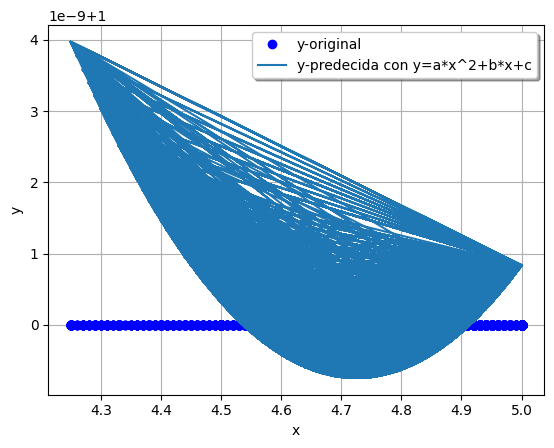

In [211]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred1, label="y-predecida con y=a*x^2+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [212]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo1 = r2_score(y,y_pred1)
print('El coeficiente de determinación es:',R2_Modelo1)
#Calculamos el coefieciente de correlación del modelo
R = np.sqrt(R2_Modelo1)
print('El coeficiente de correlación es:',R)

El coeficiente de determinación es: 0.0
El coeficiente de correlación es: 0.0


**MODELO 2**

In [213]:
def funcion_cuadratica_inversa (x,a): #Variable x y los coeficientes a,b,c
    return 1 / (a * x**2)

In [214]:
#Ajustamos los parámetros de la función curve_fit
parametros2, covs = curve_fit(funcion_cuadratica_inversa,df['review_scores_rating'],df['host_response_rate'])
parametros2

array([0.04378272])

In [215]:
# Predicciones
y_pred2 = funcion_cuadratica_inversa(x, *parametros2)
#Calculamos las predicciones y reestructuramos el vector de predicciones
y_pred2

,review_scores_rating
0,1.033955
1,1.012302
2,1.137997
3,0.999635
4,1.070073
...,...
9886,0.991322
9887,0.991322
9888,0.991322
9889,0.991322


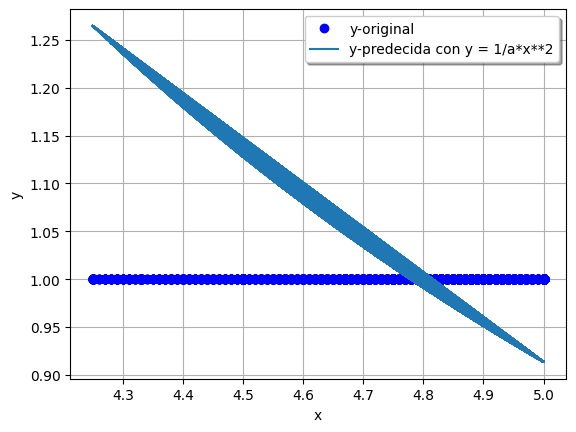

In [216]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred2, label="y-predecida con y = 1/a*x**2")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [217]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo2 = r2_score(y,y_pred2)
print('El coeficiente de determinación es:',R2_Modelo2)
#Calculamos el coefieciente de correlación del modelo
R = np.sqrt(R2_Modelo2)
print('El coeficiente de correlación es:',R)

El coeficiente de determinación es: 0.0
El coeficiente de correlación es: 0.0


# Host_acceptance_rate

**REGRESIÓN LINEAL**

In [218]:
# Declaramos las variables correctamente
Vari_Independiente = df[['number_of_reviews']]  
Vari_Dependiente = df['host_acceptance_rate']      

# Modelo de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Ajustar el modelo
model.fit(X=Vari_Independiente, y=Vari_Dependiente)

# Coeficientes
coef_Deter = model.score(X=Vari_Independiente, y=Vari_Dependiente)
print(f'Coeficiente de determinación:', coef_Deter)

coef_Correl = np.sqrt(coef_Deter)
print(f'Coeficiente de correlación:', coef_Correl)

Coeficiente de determinación: 0.024338398494175184
Coeficiente de correlación: 0.1560076872919254


**REGRESIÓN NO LINEAL**

In [219]:
#Declaramos las variables dependientes e independientes para la regresión  no lineal
Vars_Indep = df[['number_of_reviews']]
Var_Dep = df['host_acceptance_rate']

#Redefinimos
x = Vars_Indep
y = Var_Dep

**MODELO 1**

In [220]:
def funcion_exponencial(x, a, b, c):
    return a * np.exp(-b * x) + c

In [221]:
#Ajustamos los parámetros de la función curve_fit
parametros3, covs = curve_fit(funcion_exponencial,df['number_of_reviews'],df['host_acceptance_rate'])
parametros3

array([0.02744639, 0.11422689, 0.96659497])

In [222]:
# Predicciones
y_pred3 = funcion_exponencial(x, *parametros3)
#Calculamos las predicciones y reestructuramos el vector de predicciones
y_pred3

,number_of_reviews
0,0.966641
1,0.968003
2,0.971430
3,0.969390
4,0.971430
...,...
9886,0.994041
9887,0.994041
9888,0.994041
9889,0.994041


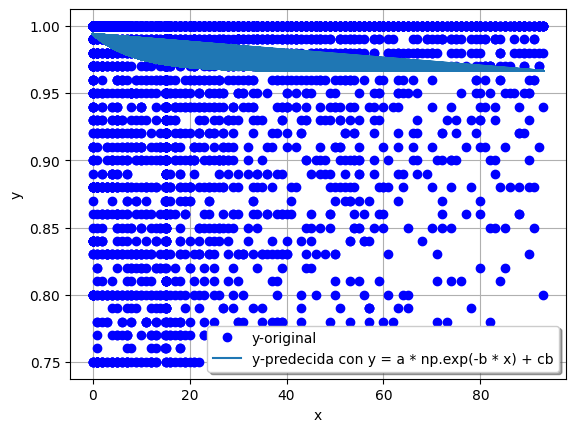

In [223]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred3, label="y-predecida con y = a * np.exp(-b * x) + cb")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [224]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo2 = r2_score(y,y_pred3)
print('El coeficiente de determinación es:',R2_Modelo2)
#Calculamos el coefieciente de correlación del modelo
R = np.sqrt(R2_Modelo2)
print('El coeficiente de correlación es:',R)

El coeficiente de determinación es: 0.042129409189854305
El coeficiente de correlación es: 0.20525449858615596


**MODELO 2**

In [225]:
#Ajustamos los parámetros de la función curve_fit
parametros4, covs = curve_fit(funcion_cuadratica,df['number_of_reviews'],df['host_acceptance_rate'])
parametros4

array([ 1.20998397e-05, -1.21852877e-03,  9.90556837e-01])

In [226]:
# Predicciones
y_pred4 = funcion_cuadratica(x, *parametros4)
#Calculamos las predicciones y reestructuramos el vector de predicciones
y_pred4

,number_of_reviews
0,0.960264
1,0.967055
2,0.974831
3,0.971026
4,0.974831
...,...
9886,0.990557
9887,0.990557
9888,0.990557
9889,0.990557


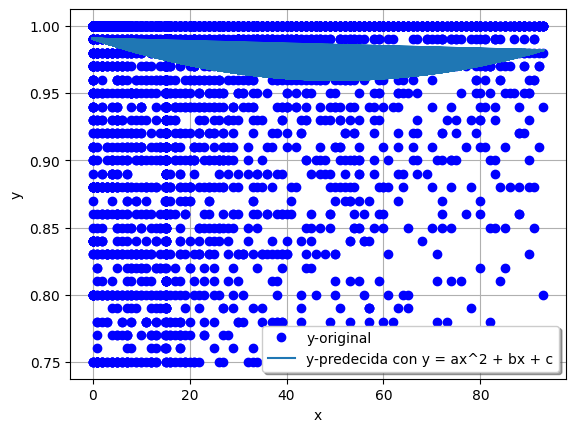

In [227]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred4, label="y-predecida con y = ax^2 + bx + c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [228]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo2 = r2_score(y,y_pred4)
print('El coeficiente de determinación es:',R2_Modelo2)
#Calculamos el coefieciente de correlación del modelo
R = np.sqrt(R2_Modelo2)
print('El coeficiente de correlación es:',R)

El coeficiente de determinación es: 0.038610987249335316
El coeficiente de correlación es: 0.1964967868677127


# Host_total_listings_count

**REGRESIÓN LINEAL**

In [229]:
# Declaramos las variables correctamente
Vari_Independiente = df[['availability_365']]  
Vari_Dependiente = df['host_total_listings_count']      

# Modelo de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Ajustar el modelo
model.fit(X=Vari_Independiente, y=Vari_Dependiente)

# Coeficientes
coef_Deter = model.score(X=Vari_Independiente, y=Vari_Dependiente)
print(f'Coeficiente de determinación:', coef_Deter)

coef_Correl = np.sqrt(coef_Deter)
print(f'Coeficiente de correlación:', coef_Correl)

Coeficiente de determinación: 0.01491759515562896
Coeficiente de correlación: 0.1221376074582639


**REGRESIÓN NO LINEAL**

In [305]:
#Declaramos las variables dependientes e independientes para la regresión  no lineal
Vars_Indep = df[['availability_365']]
Var_Dep = df['host_total_listings_count']

#Redefinimos
x = Vars_Indep
y = Var_Dep

**MODELO 1**

Función cuadrática, ya use esa función por lo que solo la mando a llamar

In [231]:
#Ajustamos los parámetros de la función curve_fit
parametros5, covs = curve_fit(funcion_cuadratica,df['availability_365'],df['host_total_listings_count'])
parametros5

array([-6.58233397e-06,  3.11611095e-03,  1.58725155e+00])

In [232]:
# Predicciones
y_pred5 = funcion_cuadratica(x, *parametros5)
#Calculamos las predicciones y reestructuramos el vector de predicciones
y_pred5

,availability_365
0,1.927982
1,1.800543
2,1.808532
3,1.829414
4,1.925876
...,...
9886,1.887165
9887,1.907027
9888,1.812447
9889,1.847701


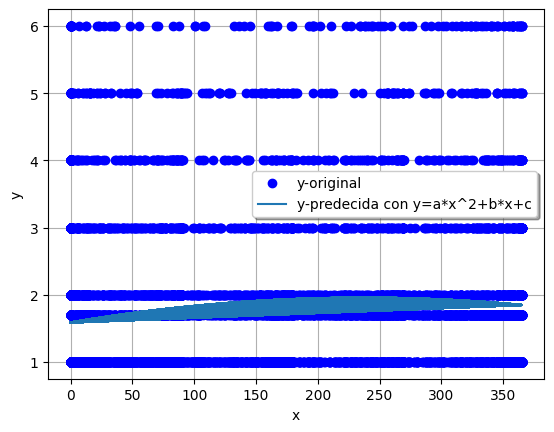

In [233]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred5, label="y-predecida con y=a*x^2+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [234]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo2 = r2_score(y,y_pred5)
print('El coeficiente de determinación es:',R2_Modelo2)
#Calculamos el coefieciente de correlación del modelo
R = np.sqrt(R2_Modelo2)
print('El coeficiente de correlación es:',R)

El coeficiente de determinación es: 0.019989447481657985
El coeficiente de correlación es: 0.14138404252834896


**MODELO 2**

Función exponencial negativa, ya use esa función por lo que solo la mando a llamar

In [306]:
#Ajustamos los parámetros de la función curve_fit
parametros6, covs = curve_fit(funcion_exponencial,df['availability_365'],df['host_total_listings_count'])
parametros6

array([-0.32312571,  0.01909471,  1.90224092])

In [307]:
# Predicciones
y_pred6 = funcion_exponencial(x, *parametros6)
#Calculamos las predicciones y reestructuramos el vector de predicciones
y_pred6

,availability_365
0,1.901229
1,1.836008
2,1.840878
3,1.852503
4,1.889421
...,...
9886,1.901742
9887,1.901564
9888,1.843177
9889,1.901937


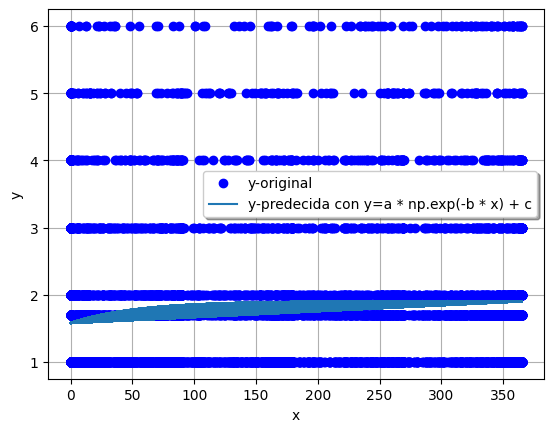

In [308]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred6, label="y-predecida con y=a * np.exp(-b * x) + c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [238]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo2 = r2_score(y,y_pred6)
print('El coeficiente de determinación es:',R2_Modelo2)
#Calculamos el coefieciente de correlación del modelo
R = np.sqrt(R2_Modelo2)
print('El coeficiente de correlación es:',R)

El coeficiente de determinación es: 0.019606855171750537
El coeficiente de correlación es: 0.1400244806158928


# Accommodates

**REGRESIÓN LINEAL**

In [239]:
# Declaramos las variables correctamente
Vari_Independiente = df[['bedrooms']]  
Vari_Dependiente = df['accommodates']      

# Modelo de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Ajustar el modelo
model.fit(X=Vari_Independiente, y=Vari_Dependiente)

# Coeficientes
coef_Deter = model.score(X=Vari_Independiente, y=Vari_Dependiente)
print(f'Coeficiente de determinación:', coef_Deter)

coef_Correl = np.sqrt(coef_Deter)
print(f'Coeficiente de correlación:', coef_Correl)

Coeficiente de determinación: 0.35778929719683805
Coeficiente de correlación: 0.5981549107019335


**REGRESIÓN NO LINEAL**

In [240]:
#Declaramos las variables dependientes e independientes para la regresión  no lineal
Vars_Indep = df[['bedrooms']]
Var_Dep = df['accommodates']

#Redefinimos
x = Vars_Indep
y = Var_Dep

**MODELO 1**

In [241]:
def funcion_valor_absoluto(x, a, b, c):
    return a * np.abs(x) + b * x + c

In [242]:
#Ajustamos los parámetros de la función curve_fit
parametros7, covs = curve_fit(funcion_valor_absoluto,df['bedrooms'],df['accommodates'])
parametros7

array([-111.186204  ,  112.44006326,    1.46968724])

In [243]:
# Predicciones
y_pred7 = funcion_valor_absoluto(x, *parametros7)
#Calculamos las predicciones y reestructuramos el vector de predicciones
y_pred7

,bedrooms
0,5.231265
1,2.723546
2,2.723546
3,2.723546
4,5.231265
...,...
9886,3.977406
9887,3.977406
9888,2.723546
9889,3.977406


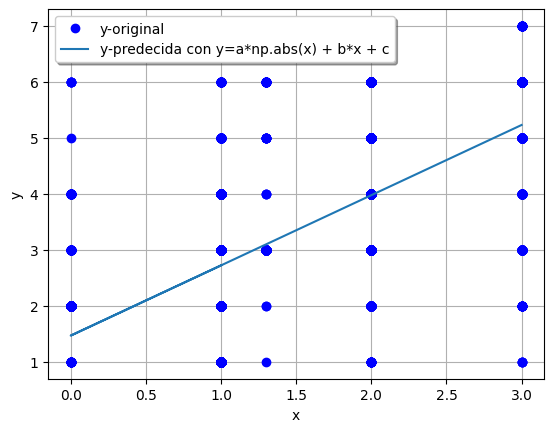

In [244]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred7, label="y-predecida con y=a*np.abs(x) + b*x + c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [245]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo2 = r2_score(y,y_pred7)
print('El coeficiente de determinación es:',R2_Modelo2)
#Calculamos el coefieciente de correlación del modelo
R = np.sqrt(R2_Modelo2)
print('El coeficiente de correlación es:',R)

El coeficiente de determinación es: 0.3577892971968377
El coeficiente de correlación es: 0.5981549107019333


**MODELO 2**

In [246]:
#Ajustamos los parámetros de la función curve_fit
parametros8, covs = curve_fit(funcion_cuadratica,df['bedrooms'],df['accommodates'])
parametros8

array([0.15443864, 0.77377217, 1.7641265 ])

In [247]:
# Predicciones
y_pred8 = funcion_cuadratica(x, *parametros8)
#Calculamos las predicciones y reestructuramos el vector de predicciones
y_pred8

,bedrooms
0,5.475391
1,2.692337
2,2.692337
3,2.692337
4,5.475391
...,...
9886,3.929425
9887,3.929425
9888,2.692337
9889,3.929425


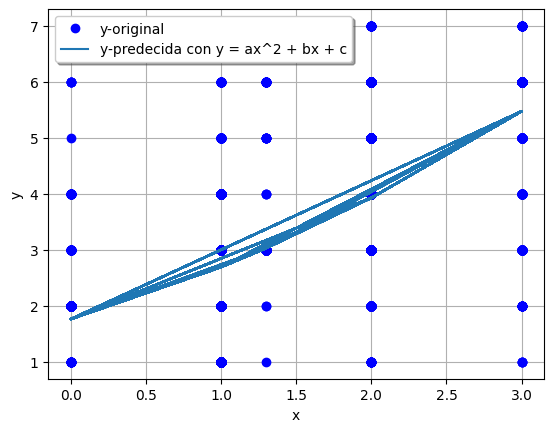

In [248]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred8, label="y-predecida con y = ax^2 + bx + c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [249]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo2 = r2_score(y,y_pred8)
print('El coeficiente de determinación es:',R2_Modelo2)
#Calculamos el coefieciente de correlación del modelo
R = np.sqrt(R2_Modelo2)
print('El coeficiente de correlación es:',R)

El coeficiente de determinación es: 0.36309497481203423
El coeficiente de correlación es: 0.6025736260508207


# Reviews_per_month

**Regresión lineal**

In [250]:
# Declaramos las variables correctamente
Vari_Independiente = df[['price']]  
Vari_Dependiente = df['reviews_per_month']      

# Modelo de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Ajustar el modelo
model.fit(X=Vari_Independiente, y=Vari_Dependiente)

# Coeficientes
coef_Deter = model.score(X=Vari_Independiente, y=Vari_Dependiente)
print(f'Coeficiente de determinación:', coef_Deter)

coef_Correl = np.sqrt(coef_Deter)
print(f'Coeficiente de correlación:', coef_Correl)

Coeficiente de determinación: 0.005321358986509539
Coeficiente de correlación: 0.07294764551724435


**Regresión no lineal**

In [251]:
#Declaramos las variables dependientes e independientes para la regresión  no lineal
Vars_Indep = df[['price']]
Var_Dep = df['reviews_per_month']

#Redefinimos
x = Vars_Indep
y = Var_Dep

**MODELO 1**

In [252]:
#Ajustamos los parámetros de la función curve_fit
parametros9, covs = curve_fit(funcion_cuadratica,df['price'],df['reviews_per_month'])
parametros9

array([ 1.12463906e-03, -1.86998305e-01,  8.49175474e+00])

In [253]:
# Predicciones
y_pred9 = funcion_cuadratica(x, *parametros9)
#Calculamos las predicciones y reestructuramos el vector de predicciones
y_pred9

,price
0,0.735071
1,1.038315
2,0.735071
3,0.745109
4,0.735071
...,...
9886,0.735071
9887,0.719967
9888,0.884181
9889,0.735071


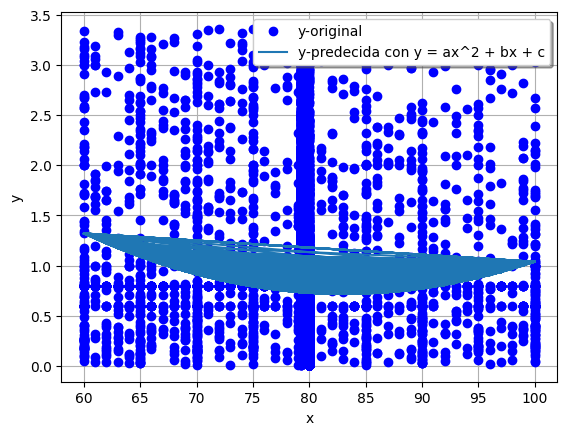

In [254]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred9, label="y-predecida con y = ax^2 + bx + c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [255]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo2 = r2_score(y,y_pred9)
print('El coeficiente de determinación es:',R2_Modelo2)
#Calculamos el coefieciente de correlación del modelo
R = np.sqrt(R2_Modelo2)
print('El coeficiente de correlación es:',R)

El coeficiente de determinación es: 0.023323152721714924
El coeficiente de correlación es: 0.15271919565567035


**MODELO 2**

In [256]:
def funcion_inversa(x, a):
    return 1 / (a * x)

In [257]:
#Ajustamos los parámetros de la función curve_fit
parametros10, covs = curve_fit(funcion_inversa,df['price'],df['reviews_per_month'])
parametros10

array([0.01638427])

In [258]:
# Predicciones
y_pred10 = funcion_inversa(x, *parametros10)
#Calculamos las predicciones y reestructuramos el vector de predicciones
y_pred10

,price
0,0.769662
1,0.610342
2,0.769662
3,0.693570
4,0.769662
...,...
9886,0.769662
9887,0.744319
9888,0.859636
9889,0.769662


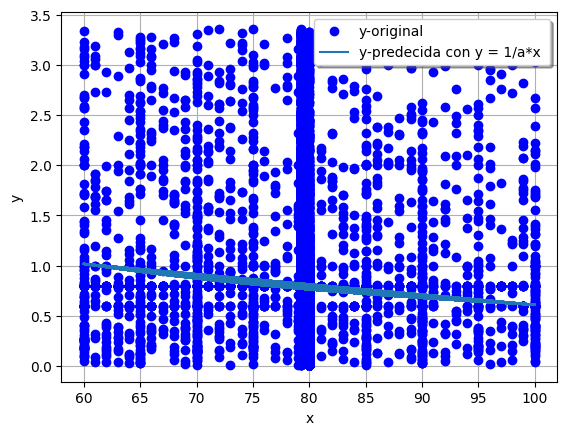

In [259]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred10, label="y-predecida con y = 1/a*x ")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [260]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo2 = r2_score(y,y_pred10)
print('El coeficiente de determinación es:',R2_Modelo2)
#Calculamos el coefieciente de correlación del modelo
R = np.sqrt(R2_Modelo2)
print('El coeficiente de correlación es:',R)

El coeficiente de determinación es: 0.008871277917241405
El coeficiente de correlación es: 0.0941874615712803


# Price

**Regresión lineal**

In [269]:
# Declaramos las variables correctamente
Vari_Independiente = df[['accommodates']]  
Vari_Dependiente = df['price']      

# Modelo de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Ajustar el modelo
model.fit(X=Vari_Independiente, y=Vari_Dependiente)

# Coeficientes
coef_Deter = model.score(X=Vari_Independiente, y=Vari_Dependiente)
print(f'Coeficiente de determinación:', coef_Deter)

coef_Correl = np.sqrt(coef_Deter)
print(f'Coeficiente de correlación:', coef_Correl)

Coeficiente de determinación: 0.008686614212002786
Coeficiente de correlación: 0.09320200755350061


**Regresión no lineal**

In [309]:
#Declaramos las variables dependientes e independientes para la regresión  no lineal
Vars_Indep = df[['accommodates']]
Var_Dep = df['price']

#Redefinimos
x = Vars_Indep
y = Var_Dep

**MODELO 1**

In [310]:
#Ajustamos los parámetros de la función curve_fit
parametros11, covs = curve_fit(funcion_cuadratica,df['accommodates'],df['price'])
parametros11

array([-1.58794339e-02,  5.11640166e-01,  7.79357099e+01])

In [311]:
# Predicciones
y_pred11 = funcion_cuadratica(x, *parametros11)
#Calculamos las predicciones y reestructuramos el vector de predicciones
y_pred11

,accommodates
0,80.096925
1,79.728200
2,78.895472
3,78.895472
4,80.433891
...,...
9886,80.096925
9887,80.433891
9888,78.895472
9889,79.728200


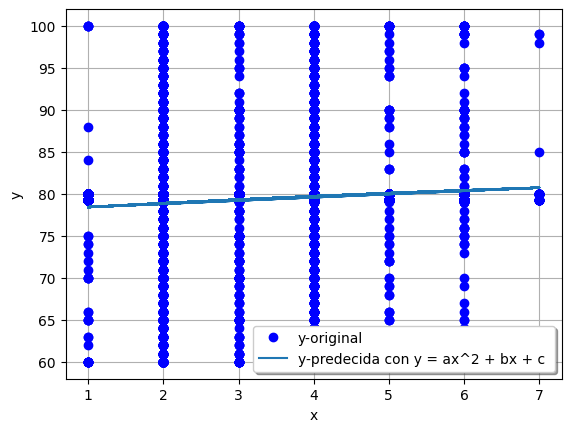

In [312]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred11, label="y-predecida con y = ax^2 + bx + c ")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [274]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo2 = r2_score(y,y_pred11)
print('El coeficiente de determinación es:',R2_Modelo2)
#Calculamos el coefieciente de correlación del modelo
R = np.sqrt(R2_Modelo2)
print('El coeficiente de correlación es:',R)

El coeficiente de determinación es: 0.008717058309720471
El coeficiente de correlación es: 0.09336518788992218


**MODELO 2**

In [290]:
def funcion_logaritmica(x, a, b):
    return a * np.log(x) + b

In [299]:
#Ajustamos los parámetros de la función curve_fit
parametros12, covs = curve_fit(funcion_logaritmica,df['accommodates'],df['price'])
parametros12

array([ 1.1522929 , 78.14804678])

In [300]:
# Predicciones
y_pred12 = funcion_logaritmica(x, *parametros12)
#Calculamos las predicciones y reestructuramos el vector de predicciones
y_pred12

,accommodates
0,80.002591
1,79.745464
2,78.946755
3,78.946755
4,80.212678
...,...
9886,80.002591
9887,80.212678
9888,78.946755
9889,79.745464


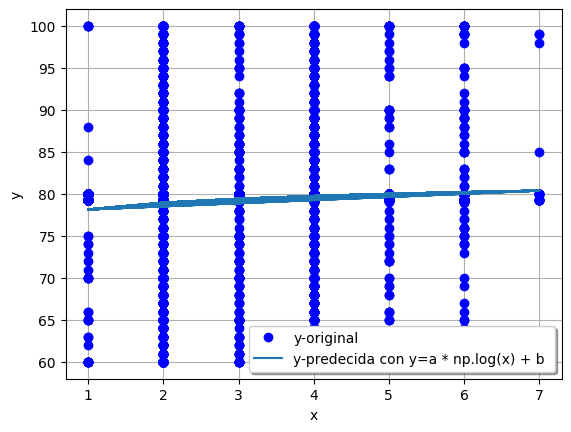

In [303]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred12, label="y-predecida con y=a * np.log(x) + b ")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [302]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo2 = r2_score(y,y_pred12)
print('El coeficiente de determinación es:',R2_Modelo2)
#Calculamos el coefieciente de correlación del modelo
R = np.sqrt(R2_Modelo2)
print('El coeficiente de correlación es:',R)

El coeficiente de determinación es: 0.00792425282284659
El coeficiente de correlación es: 0.08901827240991925
